In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from scipy.stats import zscore

# 1. Data Gathering

In [5]:
df = pd.read_csv("../medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 2. Explioratorty Data Analysis and Feature Engg

## 1. Age

In [6]:
df["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [7]:
df["age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: age
Non-Null Count  Dtype
--------------  -----
1338 non-null   int64
dtypes: int64(1)
memory usage: 10.6 KB


In [8]:
df["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

### Detecting Outliers

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

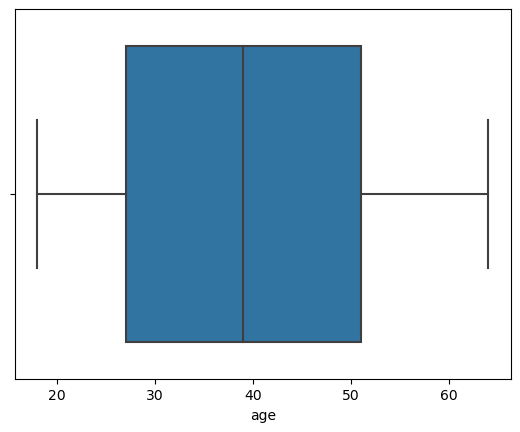

In [9]:
sns.boxplot(df["age"])

In [10]:
# No OUtliers.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 2. sex

In [12]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [13]:
df["sex"].replace({"male": 1, "female": 0}, inplace = True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [14]:
df["sex"].isna().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


## 3. bmi

In [16]:
df["bmi"].isna().sum()

0

In [17]:
# No null values

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

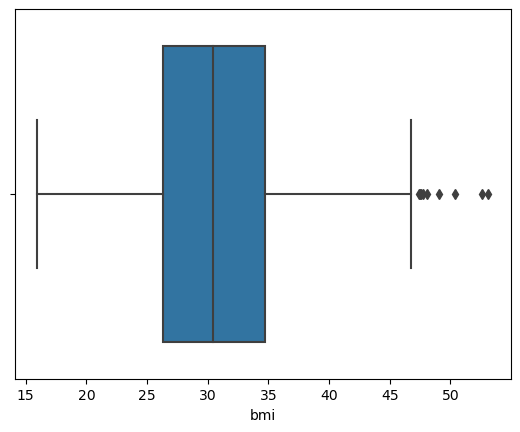

In [18]:
sns.boxplot(df["bmi"])

In [19]:
# Outliers Detected
# Outliers are only in the upper tail
# Getting the outliers

In [20]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)
median = df['bmi'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 26.29625
Q2 : 30.4
Q3 : 34.69375
Median : 30.4
upper_tail : 47.290000000000006
lower_tail : 13.7


In [21]:
df["bmi"].loc[df["bmi"] > upper_tail]

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [22]:
# Handling the outliers by tranformation

In [23]:
# Log Tranformation

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

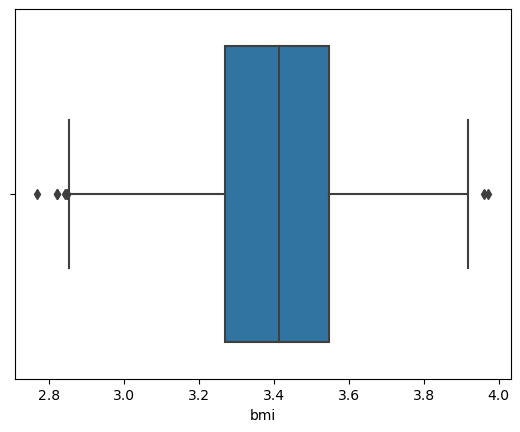

In [24]:
sns.boxplot(np.log(df["bmi"]))

In [25]:
# Sqrt tranformation

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

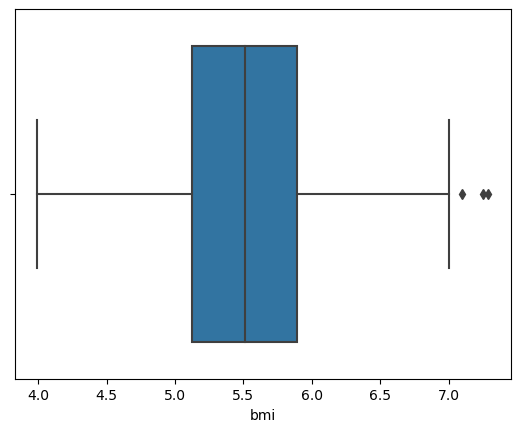

In [26]:
sns.boxplot(np.sqrt(df["bmi"]))

In [27]:
# cube root tranformation

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

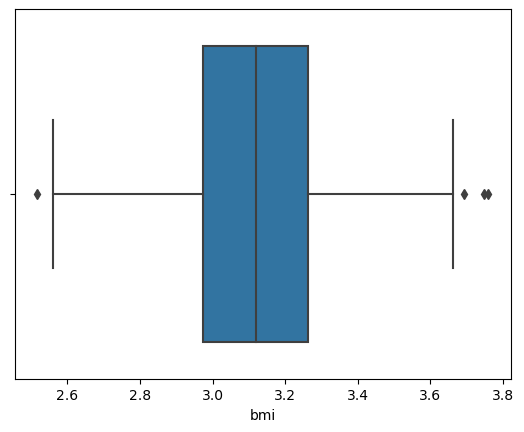

In [28]:
sns.boxplot(np.cbrt(df["bmi"]))

In [29]:
# reciprocal

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

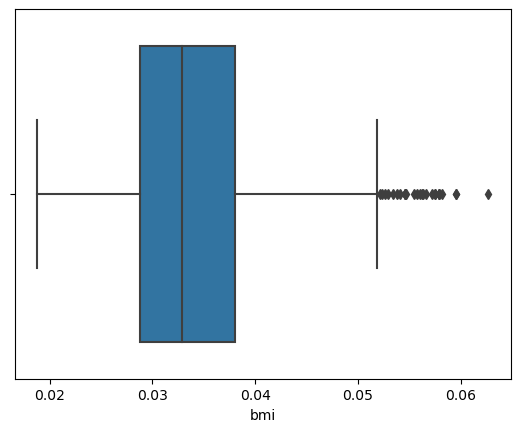

In [30]:
sns.boxplot(1/(df["bmi"]))

In [31]:
# standardization

In [32]:
z_score_values = zscore(df['bmi'])
z_score_values

0      -0.453320
1       0.509621
2       0.383307
3      -1.305531
4      -0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336   -0.797813
1337   -0.261388
Name: bmi, Length: 1338, dtype: float64

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

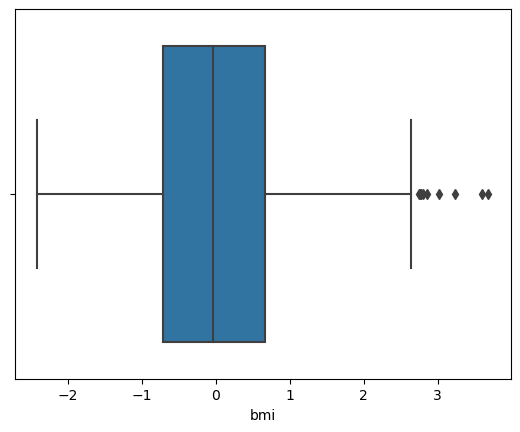

In [33]:
sns.boxplot(z_score_values)

In [34]:
# Normlization

In [35]:
min_value = np.min(df['bmi'])
max_value = np.max(df['bmi'])

In [36]:
normalized_list = []

for i in df['bmi']:
    normalized_value = (i- min_value)/(max_value - min_value)
    normalized_list.append(normalized_value)
    
normalized_list

[0.3212267958030669,
 0.479149852031208,
 0.4584342211460855,
 0.18146354587032545,
 0.3475921442023136,
 0.26311541565778845,
 0.47027172450901256,
 0.3169222491256389,
 0.37315039009954254,
 0.265805757331181,
 0.2760290556900726,
 0.27791229486144736,
 0.49609900457358075,
 0.6419155232714554,
 0.7040624159268227,
 0.2324455205811138,
 0.3987086359967716,
 0.2121334409470002,
 0.6548291633037394,
 0.5203120796341134,
 0.5392789884315308,
 0.4422921711057303,
 0.48802797955340327,
 0.4293785310734463,
 0.3245897228948076,
 0.31638418079096037,
 0.1916868442292171,
 0.4523809523809523,
 0.03833736884584344,
 0.5472154963680386,
 0.5283831046542911,
 0.27858488027979555,
 0.34005918751681463,
 0.33225719666397624,
 0.5499058380414312,
 0.12012375571697605,
 0.4574926015603982,
 0.130212536992198,
 0.5571697605595911,
 0.6440677966101694,
 0.2862523540489642,
 0.5560936238902341,
 0.1565778853914447,
 0.3992467043314501,
 0.5673930589184826,
 0.5741189131019638,
 0.6108420769437718,
 0.

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

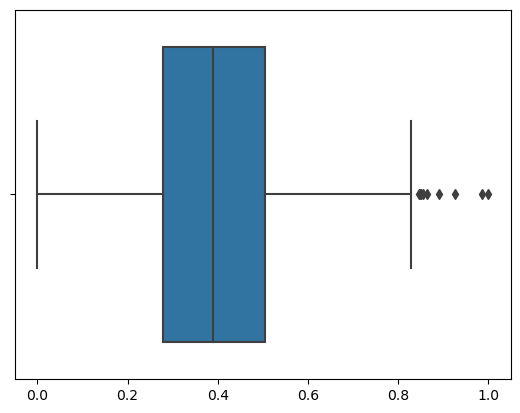

In [37]:
sns.boxplot(normalized_list)

In [38]:
# Lowest outliers are there in SQrt and Cbrt tranformation
# we will find the lowest of both

In [39]:
# 1. Sqrt

In [40]:
q1 = np.sqrt(df['bmi']).quantile(0.25)
q2 = np.sqrt(df['bmi']).quantile(0.50)
q3 = np.sqrt(df['bmi']).quantile(0.75)
median = np.sqrt(df['bmi']).median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :",median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 5.1279868258563415
Q2 : 5.513619500836088
Q3 : 5.890139994550671
Median : 5.513619500836088
upper_tail : 7.033369747592165
lower_tail : 3.9847570728148476


In [41]:
np.sqrt(df['bmi']).loc[np.sqrt(df['bmi']) > upper_tail]

847     7.097887
1047    7.251207
1317    7.289033
Name: bmi, dtype: float64

In [42]:
# So we will do Sqrt tranformation
# 

In [43]:
df["bmi"] = np.sqrt(df['bmi'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,5.282045,0,yes,southwest,16884.92400
1,18,1,5.811196,1,no,southeast,1725.55230
2,28,1,5.744563,3,no,southeast,4449.46200
3,33,1,4.764976,0,no,northwest,21984.47061
4,32,1,5.374012,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,5.565070,3,no,northwest,10600.54830
1334,18,0,5.649779,0,no,northeast,2205.98080
1335,18,0,6.070420,0,no,southeast,1629.83350
1336,21,0,5.079370,0,no,southwest,2007.94500


In [44]:
# now the remaining 3 outliers will be replaced by mean().

In [45]:
df['bmi'].loc[df['bmi'] > upper_tail] = df['bmi'].mean()

C:\Users\rohit\AppData\Local\Temp\ipykernel_7940\1889236414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'].loc[df['bmi'] > upper_tail] = df['bmi'].mean()


In [46]:
# Now checking for Outliers

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

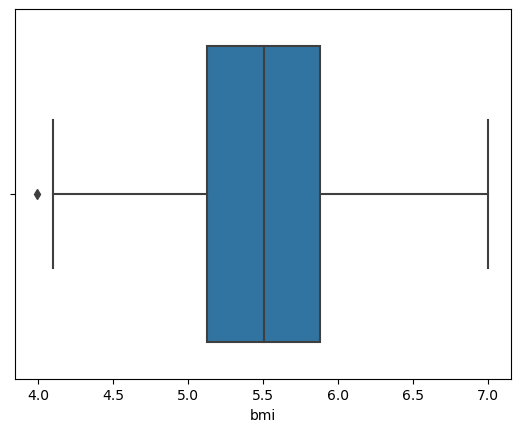

In [47]:
sns.boxplot(df["bmi"])

In [48]:
# Only one outlier but not that signifcant as compared to size of data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


## 4. children

In [50]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [51]:
df["children"].isna().sum()

0

## 5. smoker

In [52]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [53]:
df["smoker"].isna().sum()

0

In [54]:
df["smoker"].replace({"yes": 1 , "no" : 0}, inplace = True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,5.282045,0,1,southwest,16884.92400
1,18,1,5.811196,1,0,southeast,1725.55230
2,28,1,5.744563,3,0,southeast,4449.46200
3,33,1,4.764976,0,0,northwest,21984.47061
4,32,1,5.374012,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,5.565070,3,0,northwest,10600.54830
1334,18,0,5.649779,0,0,northeast,2205.98080
1335,18,0,6.070420,0,0,southeast,1629.83350
1336,21,0,5.079370,0,0,southwest,2007.94500


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


## 6. region

In [56]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [57]:
df = pd.get_dummies(df, columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,5.282045,0,1,16884.92400,0,0,0,1
1,18,1,5.811196,1,0,1725.55230,0,0,1,0
2,28,1,5.744563,3,0,4449.46200,0,0,1,0
3,33,1,4.764976,0,0,21984.47061,0,1,0,0
4,32,1,5.374012,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,5.565070,3,0,10600.54830,0,1,0,0
1334,18,0,5.649779,0,0,2205.98080,1,0,0,0
1335,18,0,6.070420,0,0,1629.83350,0,0,1,0
1336,21,0,5.079370,0,0,2007.94500,0,0,0,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


## Checking the Target column

## Charges 

In [59]:
df["charges"].isna().sum()

0

In [60]:
# Now whole data is numeric are ready of linear alogorithms

# 3. Feature Selection

## Checking the assumptions

### 1. Linearity 

In [61]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.123272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.039876,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.123272,0.039876,1.000000,0.015627,-0.000283,0.199785,-0.137833,-0.128462,0.255387,0.001128
children,0.042469,0.017163,0.015627,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,-0.000283,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.199785,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.137833,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.128462,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.255387,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,0.001128,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

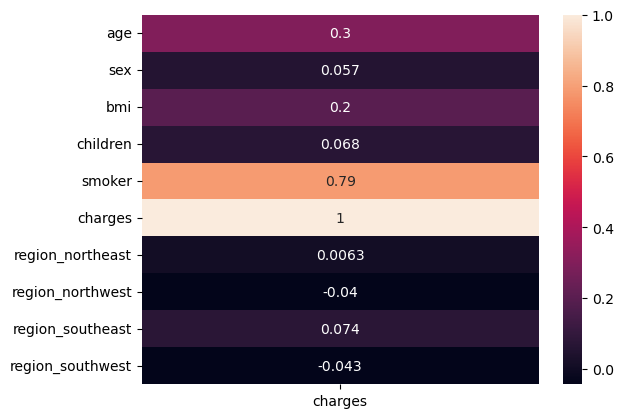

In [62]:
sns.heatmap(corr[["charges"]], annot = True)

In [63]:
# Conclusion

### 2. No Multi Colinearity 

<AxesSubplot:>

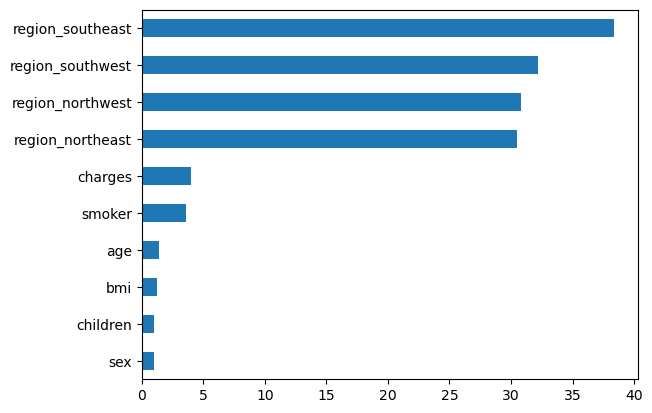

In [64]:
vif_list = []

for i in range(df.shape[1]):
    vif = variance_inflation_factor(df.to_numpy(),i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index=df.columns)
s1.sort_values().plot(kind = 'barh')

In [65]:
# Vif values are less than 5 for each feature
# We can see that all the features are not multi colinear

# 4 Model Building

In [66]:
# Splitting the data

In [67]:
x = df.drop("charges", axis = 1) 
x

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,5.282045,0,1,0,0,0,1
1,18,1,5.811196,1,0,0,0,1,0
2,28,1,5.744563,3,0,0,0,1,0
3,33,1,4.764976,0,0,0,1,0,0
4,32,1,5.374012,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,5.565070,3,0,0,1,0,0
1334,18,0,5.649779,0,0,1,0,0,0
1335,18,0,6.070420,0,0,0,0,1,0
1336,21,0,5.079370,0,0,0,0,0,1


In [68]:
y = df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2 ,random_state=48)
x_train


,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
655,52,0,5.029911,2,1,0,0,1,0
516,20,1,5.942222,1,0,0,0,1,0
226,28,1,6.169279,0,0,0,0,1,0
149,19,1,5.329165,1,0,0,0,0,1
11,62,0,5.127377,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
454,32,1,6.821290,2,0,0,0,1,0
966,51,1,4.979458,2,1,0,1,0,0
944,62,1,6.319019,0,0,0,0,1,0
347,46,1,5.774513,1,0,1,0,0,0


In [70]:
x_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
451,30,1,4.912230,1,0,0,1,0,0
1174,29,1,5.666569,2,0,0,1,0,0
213,34,0,5.170106,1,0,0,0,1,0
174,24,0,5.774513,0,0,0,1,0,0
648,18,1,5.338539,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
42,41,1,4.666905,1,0,0,0,1,0
782,51,1,5.997499,1,0,0,0,1,0
859,57,1,5.300943,0,0,0,0,0,1
1260,32,0,4.529901,0,0,1,0,0,0


In [71]:
display(y_train,y_test)

655    24667.41900
516    27724.28875
226     2689.49540
149     1842.51900
11     27808.72510
          ...     
454     4686.38870
966    23967.38305
944    12982.87470
347     8334.45755
563     9058.73030
Name: charges, Length: 1070, dtype: float64

451      4032.24070
1174     4433.91590
213      5002.78270
174      2855.43755
648      1712.22700
           ...     
42       6272.47720
782      9386.16130
859     10965.44600
1260     4544.23480
1224     6858.47960
Name: charges, Length: 268, dtype: float64

In [72]:
Lin_model = LinearRegression()

In [73]:
Lin_model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [74]:
# Testing

y_pred = Lin_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

r2 =  Lin_model.score(x_test, y_test)
print("Direct R Squared Value :",r2)

adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 41227805.39466487
Root Mean Sqaured Error : 6420.888209170509
Mean Absolute Error : 4445.348102199003
R Squared Value : 0.7464426208244624
Direct R Squared Value : 0.7464426208244624
Adjusted R Squared Value : 0.7375975959695018


In [75]:
# Model Evaluation for Training Data

y_pred_train = Lin_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Sqaured Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)

# Direct calculation
r2 = Lin_model.score(x_train, y_train)
print("Direct R Squared Value :",r2)

adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R Squared Value :",adj_r2)

Mean Sqaured Error : 35524056.7726622
Root Mean Sqaured Error : 5960.206101525534
Mean Absolute Error : 4189.328919392166
R Squared Value : 0.7507459874931361
Direct R Squared Value : 0.7507459874931361
Adjusted R Squared Value : 0.748629679839776


In [76]:
# R2Test = 0.7464426208244624
# R2Train = 0.7507459874931361

# variance = 0.7507459874931361 - 0.7464426208244624 
# variance = 0.004303366668673703

In [77]:
# Model has underfitted

In [78]:
import pickle

with open("linear_medical.pkl", "wb") as f:
    pickle.dump(Lin_model, f)


In [79]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [80]:
json_data = {"sex" : {"male": 1, "female": 0},
             "smoker" : {"yes": 1 , "no" : 0},
             "columns" : list(x.columns)}
json_data

{'sex': {'male': 1, 'female': 0},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [81]:
age = 45
sex = "male"
bmi = 29
children = 0.0
smoker = "no"
region = "northwest"

region = "region_" + region
region

region_index = np.where(x.columns == region)[0][0]
region_index

6

In [82]:
test_array = np.zeros(len(x.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [83]:
test_array[0] = age
test_array[1] = json_data['sex'][sex]
test_array[2] = np.sqrt(bmi)
test_array[3] = children
test_array[4] = json_data['smoker'][smoker]
test_array[region_index] = 1

test_array

array([45.        ,  1.        ,  5.38516481,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ])

In [84]:
charges = round(Lin_model.predict([test_array])[0],2)
print("Predicted Medical Insurance Charges is :", charges, "/- Rs. Only")

Predicted Medical Insurance Charges is : 8784.94 /- Rs. Only


C:\Users\rohit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [87]:
import json

In [88]:
with open("Json_data.json", "w") as f:
    json.dump(json_data,f)